# Normalized Data Baseline ML Tests

Required Data File `./normalized_global_bands_mean_stdev.csv.csv`


## Basic Data Preparation

In [1]:
import os, sys
import numpy as np
import pandas as pd


In [2]:
# Dataset location
DATASET = 'normalized_global_bands_mean_stdev.csv'
assert os.path.exists(DATASET)

# Load and shuffle
dataset = pd.read_csv(DATASET).sample(frac = 1).reset_index(drop=True)

#### Note: Becaues we are using `sample(frac = 1)` we are randomizing all the data. Therefore, results will vary from time to time based on the data set reading.

In [3]:
dataset.head()

,Unnamed: 0,OBJECTID,isBurnt,YrMo,mean_B1,stdev_B1,mean_B2,stdev_B2,mean_B3,stdev_B3,mean_B4,stdev_B4,mean_B5,stdev_B5,mean_B6,stdev_B6
0,96633,1895,1,2006_4,0.289871,0.018321,0.325234,0.022417,0.333848,0.035823,0.465070,0.015978,0.551544,0.069900,0.426185,0.058404
1,66228,1299,1,2000_6,0.294635,0.014078,0.311422,0.026444,0.347196,0.039621,0.420551,0.048489,0.529021,0.062735,0.429769,0.042028
2,132256,2594,1,1991_4,0.317965,0.013440,0.357450,0.018805,0.396201,0.019195,0.479060,0.029404,0.598714,0.042791,0.476667,0.041141
3,23069,453,1,1993_8,0.271130,0.006706,0.306024,0.008943,0.300415,0.010947,0.498327,0.033548,0.488716,0.026404,0.378257,0.024147
4,120014,2354,1,1990_5,0.239587,0.277020,0.264273,0.314793,0.274977,0.325804,0.354925,0.410307,0.375528,0.435451,0.306269,0.371245


In [5]:
# Drop first 3 columns and isBurnt label
# 0 index of columns - so ",4" drops  {0,1,2,3}
X = np.array(dataset.iloc[:,4:])
y = np.array(dataset.isBurnt)
y = y - 1  #shift from {1.2} to {0,1} for non-burn, burn

---

## Test Baseline ML Classifiers

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC


## Baseline a resubstitution Logistic Regression

In [7]:
# Create an instance of a model that can be trained
model = LogisticRegression()

# fit = "train model parameters using this data and expected outcomes"
model.fit(X, y)       
LR_RESUB_SCORE = model.score(X, y)
print("Logistic Regression: {0:6.5f}".format(LR_RESUB_SCORE))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: 0.89320


--- 

## Baseline a resubstitution KNeighborsClassifier

In [8]:
# Create an instance of a model that can be trained
model = KNeighborsClassifier()

# fit = "train model parameters using this data and expected outcomes"
model.fit(X, y)   
KNN_RESUB_SCORE = model.score(X, y)
print("KNN : {0:6.5f}".format(KNN_RESUB_SCORE))

KNN : 0.93273


--- 

## Baseline a resubstitution Decision Tree

In [9]:
# Create an instance of a model that can be trained
model = DecisionTreeClassifier()

# fit = "train model parameters using this data and expected outcomes"
model.fit(X, y)       
DT_RESUB_SCORE = model.score(X, y)
print("Decision Tree: {0:6.5f}".format(DT_RESUB_SCORE))

Decision Tree: 0.99982


--- 

## Baseline a resubstitution LinearSVC

In [10]:
# Create an instance of a model that can be trained
model = LinearSVC()

# fit = "train model parameters using this data and expected outcomes"
model.fit(X, y)       
SVC_RESUB_SCORE = model.score(X, y)
print("Linear SVC Regression: {0:6.5f}".format(SVC_RESUB_SCORE))

Linear SVC Regression: 0.89324


---
## Resubstitution Model Summary

* Logistic Regression: 0.89320
* K(5) Nearest Neighbors: 0.93273
* Decision Tree: 0.99982
* Linear SVC: 0.89324

### Question: How to these resubstitution scores differ from unnormalized?  (5 pts)
### Thoughts on why? (5 pts)

---

## Cross-Fold Analysis of Classifier Generalizability
We are going to do a 5-fold cross validation for each model.
Then, compare the degrade.

In [11]:
import sklearn.model_selection
XFOLD = 5

In [12]:
# Hide the pesky warnings from Logit
import warnings; warnings.simplefilter('ignore')

# new model
model = LogisticRegression()
# Show Prior
print("Resub Logistic Regression: {0:6.5f}".format(LR_RESUB_SCORE))
# Run Cross Val
cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv=XFOLD)

for i,acc in enumerate(cv_results):
    change = (acc-LR_RESUB_SCORE)/LR_RESUB_SCORE * 100
    print("Fold {}: {:6.5f}, change {:5.2f}%".format(i,acc,change))

print("Average Logit Acc {:5.2f}%".format(np.mean(cv_results)*100))

Resub Logistic Regression: 0.89320
Fold 0: 0.89326, change  0.01%
Fold 1: 0.89322, change  0.00%
Fold 2: 0.89310, change -0.01%
Fold 3: 0.89314, change -0.01%
Fold 4: 0.89318, change -0.00%
Average Logit Acc 89.32%


In [13]:

# new model
model = KNeighborsClassifier()
# Show Prior
print("Resub KNN: {0:6.5f}".format(KNN_RESUB_SCORE))
# Run Cross Val
cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv=XFOLD)

for i,acc in enumerate(cv_results):
    change = (acc-KNN_RESUB_SCORE)/KNN_RESUB_SCORE * 100
    print("Fold {}: {:6.5f}, change {:5.2f}%".format(i,acc,change))
    
print("Average KNN Acc {:5.2f}%".format(np.mean(cv_results)*100))

Resub KNN: 0.93273
Fold 0: 0.90667, change -2.79%
Fold 1: 0.90693, change -2.77%
Fold 2: 0.90637, change -2.83%
Fold 3: 0.90693, change -2.77%
Fold 4: 0.90811, change -2.64%
Average KNN Acc 90.70%


In [14]:
# new model
model = DecisionTreeClassifier()
# Show Prior
print("Resub Decision Tree: {0:6.5f}".format(DT_RESUB_SCORE))
# Run Cross Val
cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv=XFOLD)

for i,acc in enumerate(cv_results):
    change = (acc-DT_RESUB_SCORE)/DT_RESUB_SCORE * 100
    print("Fold {}: {:6.5f}, change {:5.2f}%".format(i,acc,change))
    
print("Average Decision Tree Acc {:5.2f}%".format(np.mean(cv_results)*100))

Resub Decision Tree: 0.99982
Fold 0: 0.87017, change -12.97%
Fold 1: 0.87102, change -12.88%
Fold 2: 0.86813, change -13.17%
Fold 3: 0.86498, change -13.49%
Fold 4: 0.86506, change -13.48%
Average Decision Tree Acc 86.79%


In [15]:
# new model
model = LinearSVC()
# Show Prior
print("Resub SVC: {0:6.5f}".format(SVC_RESUB_SCORE))
# Run Cross Val
cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv=XFOLD)

for i,acc in enumerate(cv_results):
    change = (acc-SVC_RESUB_SCORE)/SVC_RESUB_SCORE * 100
    print("Fold {}: {:6.5f}, change {:5.2f}%".format(i,acc,change))
    
print("Average Linear SVC Acc {:5.2f}%".format(np.mean(cv_results)*100))

Resub SVC: 0.89324
Fold 0: 0.89329, change  0.01%
Fold 1: 0.89325, change  0.00%
Fold 2: 0.89322, change -0.00%
Fold 3: 0.89325, change  0.00%
Fold 4: 0.89314, change -0.01%
Average Linear SVC Acc 89.32%


## Notes 
 * Average Logist Reg Acc 89.32%
 * Average KNN Acc 90.60%
 * Average Decision Tree Acc 86.72%
 * Average Linear SVC Acc 89.32%

## Questions:  
### Based on the numbers above, which method seems to be overfitting the worst? (2 pts)

### How can you tell if it is overfitting? (2 pts)

### Which is the most consistent with the normalized data? (2 pts)

### Which is the best model and what is it's accuracy? (2 pts)

---

# Take best classifer, do train/test split and Confusion Matrix

In [16]:
# Create an instance of a model that can be trained
model = KNeighborsClassifier()

from sklearn.model_selection import train_test_split

# This function returns four sets:
# Training features
#       # Testing features
#       #        # Training labels
#       #        #        # Testing labels
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.20)

# fit = "train model parameters using this data and expected outcomes"
model.fit(X_train, y_train)   


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import f1_score, confusion_matrix

# Function borrowed from:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
y_pred = model.predict(X_test)
print(y_pred)
#pred_class = np.argmax(y_pred, axis=1)

[1 0 0 ... 0 0 0]


In [19]:
np.set_printoptions(precision=2)
cnf_matrix = confusion_matrix(y_test, y_pred)

Normalized confusion matrix
[[0.97 0.03]
 [0.65 0.35]]


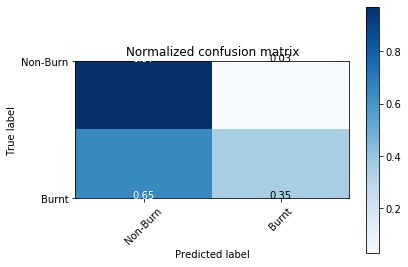

In [20]:
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=['Non-Burn','Burnt'], 
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Question:  
### Please interpret the Confusion Matrix above.  (5 pts)